# EWX Timeshift

In [10]:
%matplotlib notebook
import os
import pandas as pd
import EWX_forecast as ewx

basepath = "/home/jupyter-engiela/la-tools-test/EWX_Forecast"
os.chdir(basepath)
json_files = os.path.join(basepath, 'json')
csv_files = os.path.join(basepath, 'csv')

print('working in {}'.format(basepath))

working in /home/jupyter-engiela/la-tools-test/EWX_Forecast


In [11]:
files = ewx.sortdir(csv_files, 5)

files found in dir:  /home/jupyter-engiela/la-tools-test/EWX_Forecast/csv
                        files                time
0  NEPOOL_MECO_4070532011.csv 2019-09-01 07:41:02
1          .ipynb_checkpoints 2019-09-01 07:35:55
2                    init.git 2019-08-31 01:04:26


In [ ]:
# choose files as list
# files.files[[0]]
# files.files[:2] 

In [12]:
myfiles = files.files[[0]]
myfiles

0    NEPOOL_MECO_4070532011.csv
Name: files, dtype: object

### Inputs
- file (f)
- years to shift
- read directory
- write directory

In [13]:
for f in myfiles:
    ch3 = ewx.forecast_main(f, 10, csv_files, csv_files)

parsing data files...
using filename NEPOOL_MECO_4070532011.csv.
             Time NEPOOL_MECO_4070532011,1
0  6/22/2017 0:00                   86.928
1  6/22/2017 1:00                   83.808
2  6/22/2017 2:00                   72.432
3  6/22/2017 3:00                   70.656
4  6/22/2017 4:00                   71.568
read NEPOOL_MECO_4070532011.csv from /home/jupyter-engiela/la-tools-test/EWX_Forecast/csv.
running data validations...
...
...
...
...
...
usage validated.
running usage estimation flags...
writing validated usage file to .csv...
wrote NEPOOL_MECO_4070532011.csv to /home/jupyter-engiela/la-tools-test/EWX_Forecast/csv.
forecasting...
forecasted year 0 of 10 with 8736 reads.
forecasted year 1 of 10 with 8736 reads.
forecasted year 2 of 10 with 8736 reads.
forecasted year 3 of 10 with 8736 reads.
forecasted year 4 of 10 with 8736 reads.
forecasted year 5 of 10 with 8736 reads.
forecasted year 6 of 10 with 8736 reads.
forecasted year 7 of 10 with 8736 reads.
forecasted yea

## Plot

<IPython.core.display.Javascript object>


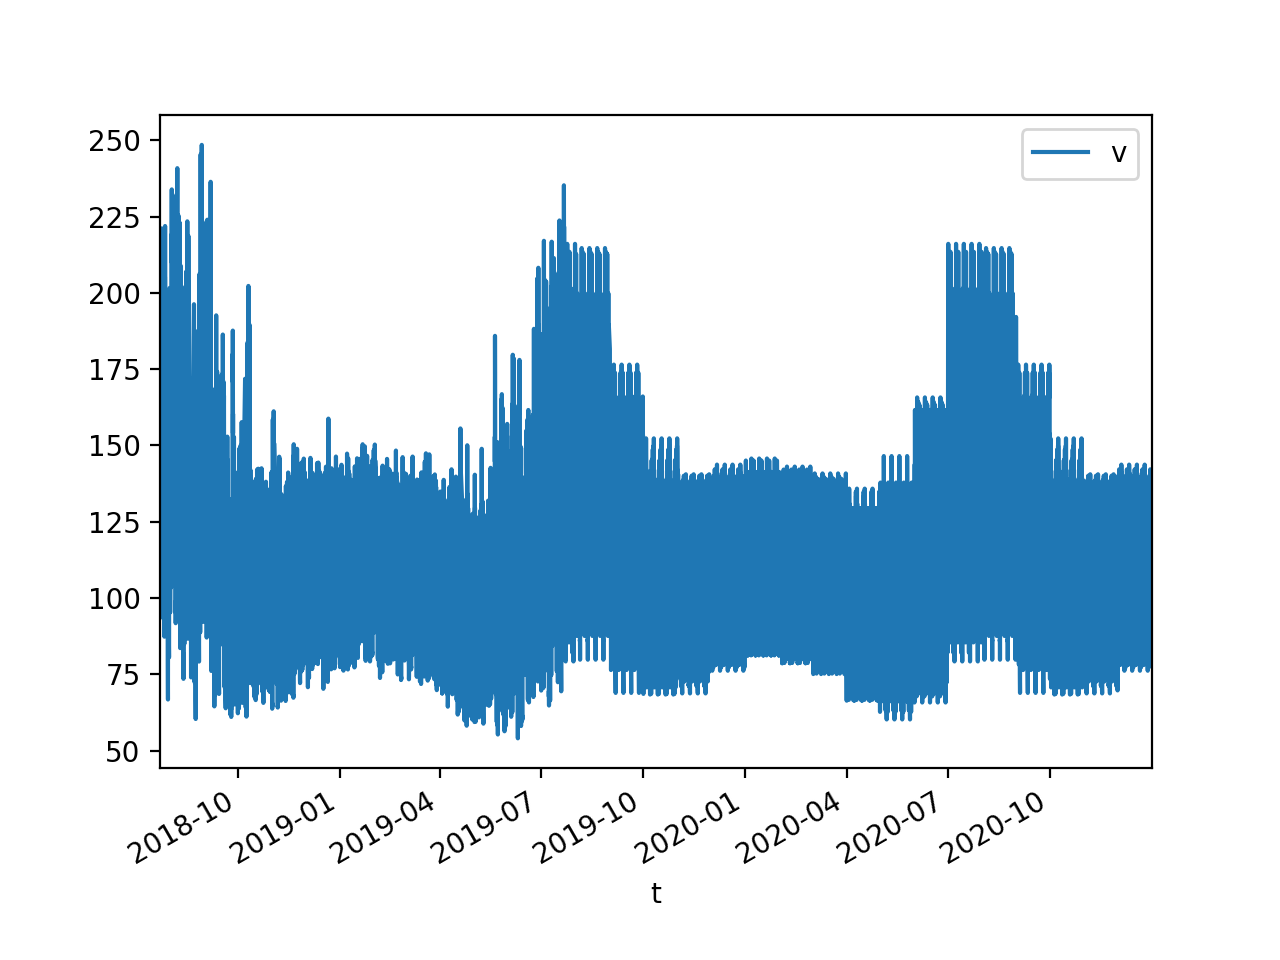

In [14]:
ch3[ch3.index.year < 2021].plot(y = 'v')